<a href="https://colab.research.google.com/github/dkowsikpai/MindBigMNIST-EEG-Classification/blob/main/Coumputer_Neuro_MNIST_04_channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets

In [ ]:
from datasets import load_dataset
train = load_dataset('DavidVivancos/MindBigData2022_MNIST_IN', split='train')
test = load_dataset('DavidVivancos/MindBigData2022_MNIST_IN', split='test')

Found cached dataset csv (/home/lenovo/.cache/huggingface/datasets/DavidVivancos___csv/DavidVivancos--MindBigData2022_MNIST_IN-2dd962d301a9367e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)
Found cached dataset csv (/home/lenovo/.cache/huggingface/datasets/DavidVivancos___csv/DavidVivancos--MindBigData2022_MNIST_IN-2dd962d301a9367e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [ ]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [ ]:
del train
del test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%ls

 bandpass_train_df.csv                         'Milestone 2'/
 bkw7n-datacite.json                            project.txt
'Coumputer_Neuro_MNIST_14_channel_(04).ipynb'   rf_model_mnist_in.plk
 Data/                                          test.csv
 experimental_paradigm_movie.mkv                test_ep.csv
 final_df_ep.csv                                train.csv
'Milestone 1'/                                  train_ep.csv


In [ ]:
df = pd.read_csv("train.csv")
df.head()

,label,AF3-0,AF3-1,AF3-2,AF3-3,AF3-4,AF3-5,AF3-6,AF3-7,AF3-8,...,PZ-246,PZ-247,PZ-248,PZ-249,PZ-250,PZ-251,PZ-252,PZ-253,PZ-254,PZ-255
0,6,4284.102564,4281.073718,4296.923077,4312.588141,4318.141025,4314.206730,4296.650640,4297.155448,4306.858974,...,4263.525640,4269.655448,4275.192307,4273.958332,4274.583332,4272.275640,4278.493589,4286.306089,4278.878204,4275.897435
1,6,4285.128205,4280.000000,4302.564102,4304.615384,4294.358974,4286.666666,4290.256410,4300.512820,4286.666666,...,4280.512820,4281.025641,4297.435897,4291.794871,4282.564102,4299.487179,4300.000000,4295.384615,4281.025641,4272.307692
2,6,4293.333333,4329.174679,4312.355768,4297.131410,4314.679486,4302.660256,4282.019231,4262.187500,4281.987179,...,4162.596153,4173.629807,4172.435897,4171.594551,4159.118589,4175.104166,4170.769230,4156.322115,4175.112179,4166.666666
3,4,4304.102564,4306.626602,4306.666666,4296.402243,4305.512820,4307.572115,4316.057691,4317.836538,4305.384615,...,4266.266025,4277.804486,4278.141025,4285.769230,4278.076923,4274.639423,4277.339743,4268.902243,4283.012820,4281.025641
4,0,4297.948717,4307.387820,4313.365384,4311.842948,4305.512820,4296.378204,4303.685897,4310.384615,4312.820512,...,4279.775641,4272.772435,4267.948717,4266.121794,4268.557692,4272.243589,4271.025641,4270.592948,4271.506410,4271.794871


In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,label,AF3-0,AF3-1,AF3-2,AF3-3,AF3-4,AF3-5,AF3-6,AF3-7,AF3-8,...,PZ-246,PZ-247,PZ-248,PZ-249,PZ-250,PZ-251,PZ-252,PZ-253,PZ-254,PZ-255
0,3,4235.384615,4226.153846,4245.128205,4240.000000,4235.384615,4227.692307,4214.871794,4216.923076,4205.128205,...,4235.384615,4217.435897,4223.589743,4222.564102,4221.025641,4221.538461,4211.794871,4223.076923,4223.076923,4222.564102
1,3,4323.076923,4301.874999,4304.519230,4306.081731,4321.538461,4315.945512,4304.695512,4313.181089,4306.282051,...,4272.516025,4251.746794,4269.871795,4264.487179,4244.391025,4260.488782,4242.660256,4251.770833,4250.929487,4240.000000
2,0,4286.666666,4283.637820,4293.525640,4281.137820,4285.801282,4284.735576,4292.051281,4305.152243,4300.384615,...,4226.233974,4225.224358,4216.089743,4214.238781,4217.532051,4219.503205,4231.282050,4223.589743,4223.894230,4233.333333
3,3,4325.128205,4309.479166,4320.657051,4317.115384,4302.499999,4312.411859,4304.503205,4306.330128,4302.628205,...,4234.935897,4243.589743,4243.333333,4243.165064,4255.592948,4248.213140,4254.166666,4250.993589,4245.625000,4261.025641
4,6,4253.333333,4270.496794,4265.801281,4276.883012,4275.032050,4292.363781,4287.339743,4265.200320,4272.435897,...,4255.721153,4251.250000,4262.499999,4254.815704,4254.407051,4253.790063,4242.307692,4261.514423,4260.737179,4251.794871


In [ ]:
print("Number of train samples:", df.shape)
print("Number of test samples:", df_test.shape)

Number of train samples: (10436, 1281)
Number of test samples: (2614, 1281)


In [ ]:
# Baseline Wandering
## Reference https://stackoverflow.com/questions/29156532/python-baseline-correction-library

import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [ ]:
data = df.filter(regex='^AF3',axis=1)
print(data.head())
mi = data.min()
mx = data.max()
data = (data - mi) / (mx - mi) 
# # data = data - mi
# # data = baseline_als(data.reshape(-1, 1), 0.3, 0.7, niter=1)
# for i in np.random.randint(0, data.shape[0], size=5):
#     plt.figure(figsize=(20, 8))
#     plt.plot(data.iloc[i])
#     plt.show()

         AF3-0        AF3-1        AF3-2        AF3-3        AF3-4  \
0  4284.102564  4281.073718  4296.923077  4312.588141  4318.141025   
1  4285.128205  4280.000000  4302.564102  4304.615384  4294.358974   
2  4293.333333  4329.174679  4312.355768  4297.131410  4314.679486   
3  4304.102564  4306.626602  4306.666666  4296.402243  4305.512820   
4  4297.948717  4307.387820  4313.365384  4311.842948  4305.512820   

         AF3-5        AF3-6        AF3-7        AF3-8        AF3-9  ...  \
0  4314.206730  4296.650640  4297.155448  4306.858974  4296.306089  ...   
1  4286.666666  4290.256410  4300.512820  4286.666666  4291.282051  ...   
2  4302.660256  4282.019231  4262.187500  4281.987179  4306.282051  ...   
3  4307.572115  4316.057691  4317.836538  4305.384615  4312.403845  ...   
4  4296.378204  4303.685897  4310.384615  4312.820512  4312.964743  ...   

       AF3-246      AF3-247      AF3-248      AF3-249      AF3-250  \
0  4302.548076  4297.139422  4299.166666  4305.056090  431

In [ ]:
data.iloc[0].to_numpy().shape

(256,)

In [ ]:
# https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut=3, highcut=30, fs=128, order=6):
    # print(data)
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def apply_on_dataset(df):
    col_prefix = ["AF3","AF4","T7","T8","PZ"]
    channels = {}
    for c in col_prefix:
        data = df.filter(regex=f'^{c}',axis=1)
        # mi = data.min()
        # mx = data.max()
        channels[c] = np.zeros(shape=(1, data.shape[1]))
        # data = (data - mi) / (mx - mi)
        for i in range(data.shape[0]):
            label = np.int32(df.iloc[i]["label"])
            y = butter_bandpass_filter(data.iloc[i], 3, 30, 128, order=6)
            # row = np.hstack((label, y))
            # print(row)
            channels[c] = np.vstack((channels[c], y.reshape(1, -1)))
        channels[c] = channels[c][1:]
            # print(y.shape)
            # break

    whole_data = np.hstack((df["label"].to_numpy().reshape(-1, 1), channels["AF3"], channels["AF4"], channels["T7"], channels["T8"], channels["PZ"]))
    return whole_data

In [ ]:
fil_df_train = apply_on_dataset(df)
fil_df_train.shape

(10436, 1281)

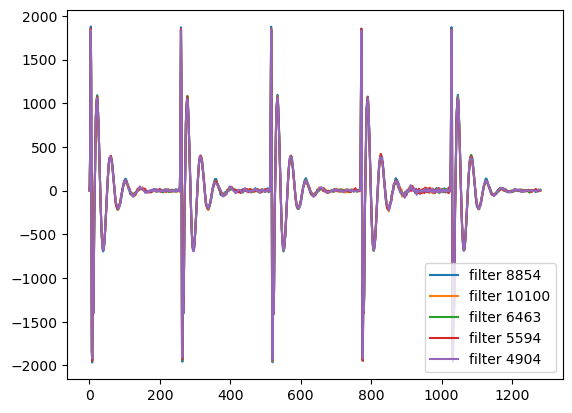

In [ ]:
# y = butter_bandpass_filter(data.iloc[0], 3, 30, 128, order=6)
# print(y.shape)
for i in np.random.randint(0, df.shape[0], 5):
    plt.plot(fil_df_train[i], label=f"filter {i}")
# plt.plot(df.iloc[0].to_numpy(), label="act")
plt.legend()

In [ ]:
train_df = pd.DataFrame(fil_df_train)
train_df[0] = train_df[0].astype(np.int16)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,6,56.865911,401.394305,1193.106391,1845.428980,1295.546240,-412.776758,-1806.994651,-1927.880415,-1449.012099,...,1.782430,1.154705,1.029473,4.191470,8.455048,9.117633,5.110520,0.637101,0.056486,2.147595
1,6,56.879525,401.462545,1193.284458,1845.734372,1295.336022,-415.942495,-1815.535629,-1937.959831,-1449.807054,...,-4.554483,-3.010850,0.091628,2.179485,5.328509,8.835600,7.708179,3.088896,1.531933,1.532468
2,6,56.988438,402.775210,1198.885919,1856.758141,1303.230002,-423.629070,-1835.359499,-1952.278274,-1455.205449,...,-13.821942,-19.952650,-22.372304,-16.678627,-6.276364,-1.944673,-6.358286,-9.173788,-4.038298,1.785159
3,4,57.131385,403.342079,1198.987134,1853.761245,1297.177997,-426.696412,-1830.068839,-1939.850436,-1438.216919,...,7.137546,-2.550492,-8.201825,-3.731200,5.193689,7.851797,1.477298,-6.648001,-9.244463,-6.428613
4,0,57.049701,402.857231,1197.999982,1853.709961,1300.568955,-420.608589,-1827.950381,-1947.776332,-1451.798725,...,6.417425,9.790510,12.036047,11.366184,5.932863,-0.447241,-1.792426,1.229979,2.036820,-2.233663


In [ ]:
train_df.to_csv("bandpass_train_df.csv", index=False)

In [ ]:
train_df = pd.read_csv("bandpass_train_df.csv")

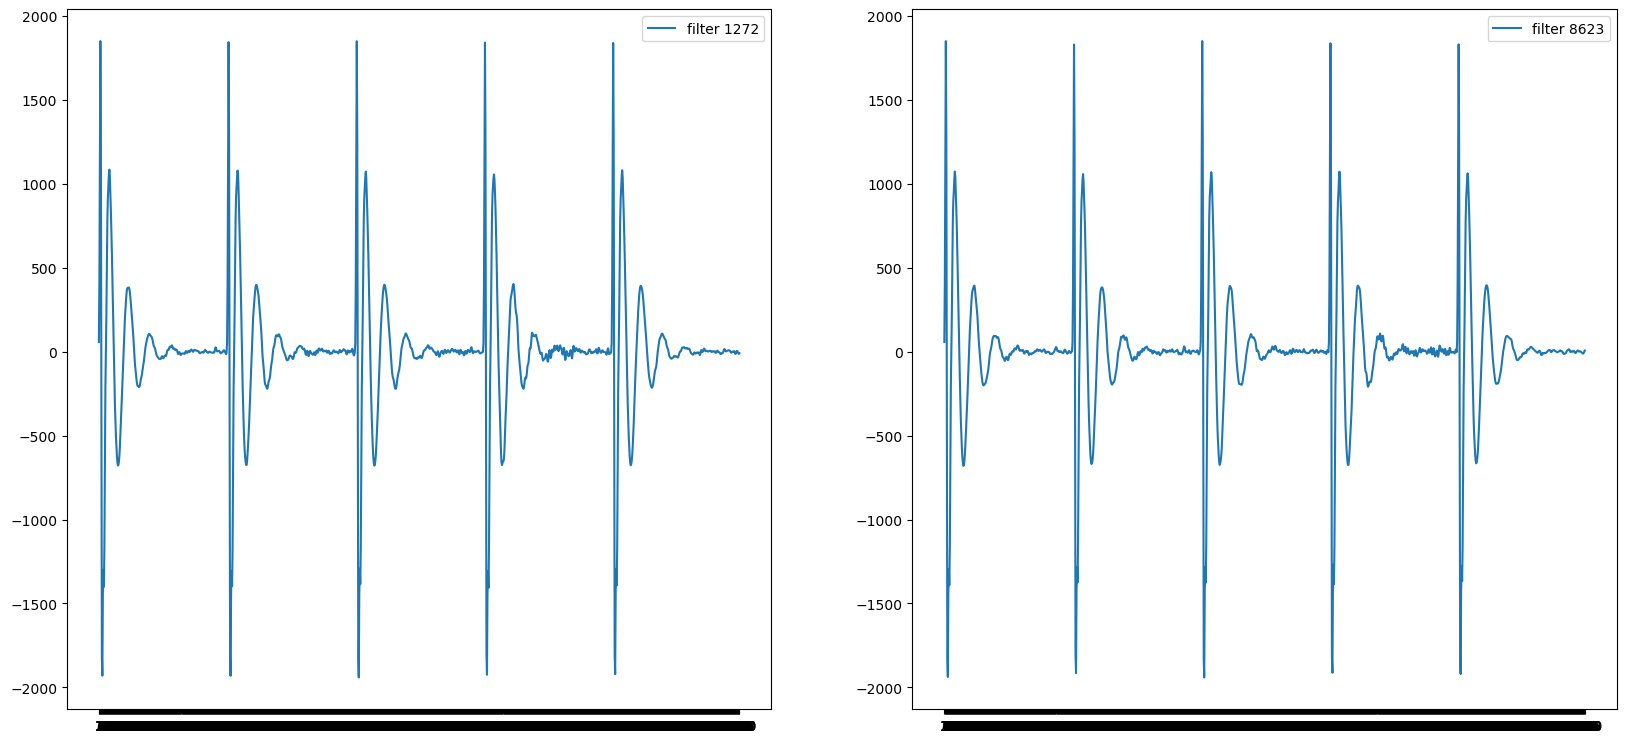

In [ ]:
plt.figure(figsize=(20, 20))
for p, i in enumerate(np.random.randint(0, train_df.shape[0], 2)):
    plt.subplot(2, 2, p+1)
    plt.plot(train_df.iloc[i, 1:], label=f"filter {i}")
    # plt.plot(df.iloc[0].to_numpy(), label="act")
    plt.legend()
plt.show()

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,6,56.865911,401.394305,1193.106391,1845.428980,1295.546240,-412.776758,-1806.994651,-1927.880415,-1449.012099,...,1.782430,1.154705,1.029473,4.191470,8.455048,9.117633,5.110520,0.637101,0.056486,2.147595
1,6,56.879525,401.462545,1193.284458,1845.734372,1295.336022,-415.942495,-1815.535629,-1937.959831,-1449.807054,...,-4.554483,-3.010850,0.091628,2.179485,5.328509,8.835600,7.708179,3.088896,1.531933,1.532468
2,6,56.988438,402.775210,1198.885919,1856.758141,1303.230002,-423.629070,-1835.359499,-1952.278274,-1455.205449,...,-13.821942,-19.952650,-22.372304,-16.678627,-6.276364,-1.944673,-6.358286,-9.173788,-4.038298,1.785159
3,4,57.131385,403.342079,1198.987134,1853.761245,1297.177997,-426.696412,-1830.068839,-1939.850436,-1438.216919,...,7.137546,-2.550492,-8.201825,-3.731200,5.193689,7.851797,1.477298,-6.648001,-9.244463,-6.428613
4,0,57.049701,402.857231,1197.999982,1853.709961,1300.568955,-420.608589,-1827.950381,-1947.776332,-1451.798725,...,6.417425,9.790510,12.036047,11.366184,5.932863,-0.447241,-1.792426,1.229979,2.036820,-2.233663


In [ ]:
train_df.shape

(10436, 1281)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["0"], axis=1), train_df["0"], test_size=0.2)

In [ ]:
tr = pd.DataFrame(X_train)
tr = pd.concat((y_train, tr), axis=1)
tr.shape

(8348, 1281)

In [ ]:
X_train.shape

(8348, 1280)

In [ ]:
X_test.shape

(2088, 1280)

In [ ]:
tr.head()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
3794,9,57.165211,403.537517,1199.505328,1854.945303,1300.048772,-421.952780,-1827.919670,-1948.241892,-1459.059648,...,-1.964518,-4.824881,-8.462596,-9.337534,-8.497899,-10.530740,-15.699583,-17.118592,-9.756773,1.637019
2570,9,57.226684,404.117457,1201.547365,1858.032912,1300.531375,-426.550229,-1831.815254,-1941.808521,-1442.524570,...,12.468291,3.911843,-5.342573,-9.335812,-7.916784,-4.778452,-2.435077,-0.633322,0.966259,0.921022
412,4,57.002052,402.207950,1194.735311,1845.283268,1288.785672,-426.907944,-1820.550546,-1929.912435,-1436.002280,...,-8.466549,-2.908817,2.246110,1.681051,-1.645756,-3.448793,-3.492580,-1.819902,0.689399,-1.494832
7809,6,56.872718,401.754843,1195.299226,1850.775277,1300.199627,-418.020901,-1824.703382,-1945.300373,-1451.059865,...,-20.643533,-18.987225,-12.647772,-0.302166,14.799766,25.344437,27.377651,23.890113,19.632103,15.963095
9283,9,57.076929,402.997859,1197.878382,1851.331881,1293.739589,-428.782939,-1828.557904,-1937.035037,-1438.772104,...,-3.712438,-11.112024,-14.350118,-12.590392,-9.948808,-8.889387,-8.351373,-6.924830,-3.406818,3.631104


In [ ]:
ag_data = []
for la in tr["0"].unique():
    t = tr[tr["0"] == la]
    mn = t.iloc[:, 1:].mean(axis=0)
    st = t.iloc[:, 1:].std(axis=0)
    t.iloc[:, 1:] = (t.iloc[:, 1:] - mn) / st
    # print(t.head())
    ag_data.append(t.copy())


/tmp/ipykernel_4920/3617546143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.iloc[:, 1:] = (t.iloc[:, 1:] - mn) / st


In [ ]:
train_df = pd.concat(ag_data, axis=0)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
5854,3,-0.027744,-0.021063,0.012281,0.111866,0.460425,0.985222,0.213304,-0.339347,-0.920959,...,0.661423,0.579999,0.221347,0.118742,0.877101,2.328983,3.540895,3.961289,3.982200,3.364587
5832,3,-0.227840,-0.346106,-0.509600,-0.760069,-1.252744,-0.751595,0.570715,0.925491,0.904537,...,-13.412597,-9.263882,2.617781,12.088339,13.813300,12.220956,10.651694,9.107333,7.145394,5.096600
3581,3,0.118993,0.136147,0.170085,0.240400,0.424430,0.355048,-0.208322,-0.533309,-0.687194,...,0.039437,0.090952,0.254786,0.518623,0.976541,1.253112,0.789764,0.046973,-0.221871,-0.002688
9705,3,0.239051,0.229413,0.216911,0.203603,0.209856,0.174485,0.127057,0.165884,0.073097,...,-1.167202,-0.796269,-0.078046,0.347456,0.083116,-0.497486,-0.679002,-0.315216,0.006446,-0.110662
2640,3,-0.613238,-0.563604,-0.516266,-0.481045,-0.460213,0.132071,0.514916,0.692396,0.746618,...,-0.851284,-0.608206,-0.170027,-0.094678,-0.667731,-1.408379,-1.429520,-0.716655,-0.079835,0.132536


In [ ]:
## Testing - unpreprocessed
train_df = pd.read_csv("./train_in.csv")
test_df = pd.read_csv("./test_in.csv")
X_train = train_df.iloc[:, 1:].to_numpy()
y_train = train_df.iloc[:, 0].to_numpy()
X_train = train_df.iloc[:, 1:].to_numpy()
y_train = train_df.iloc[:, 0].to_numpy()
X_test = test_df.iloc[:, 1:].to_numpy()
y_test = test_df.iloc[:, 0].to_numpy()

In [ ]:
X_train.shape

(8348, 1280)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# X_train = df_s.drop(["label"], axis=1)
# y_train = df_s["label"]

# X_test = df_test_s.drop(["label"], axis=1)
# y_test = df_test_s["label"]

# np.random.shuffle(fil_df_train)

# X_train = fil_df_train[:tr, 1:]
# y_train = fil_df_train[:tr, 0]
# print(X_train.shape, y_train.shape)

# X_test = fil_df_train[tr:, 1:]
# y_test = fil_df_train[tr:, 0]


In [ ]:
clf = RandomForestClassifier(max_depth=10, n_estimators=250)


In [ ]:
%timeit clf.fit(X_train, y_train)
# import pickle
# clf = pickle.load(open("rf_model_mnist_in.plk", "rb"))1



45.2 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit print(clf.score(X_train, y_train))

0.9964063248682319
0.9964063248682319
0.9964063248682319
0.9964063248682319
0.9964063248682319
0.9964063248682319
0.9964063248682319
0.9964063248682319
247 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit print(clf.score(X_test, y_test))

0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662835249
0.1068007662

In [ ]:
import pickle
pickle.dump(clf, open("rf_model_mnist_in.plk", "wb"))

In [ ]:
cols = []
for c in ["AF3","AF4","T7","T8","PZ"]:
    for i in range(1, 257):
        cols.append(f"{c}_{i}")

print(len(cols))

1280


Text(0, 0.5, 'Mean decrease in impurity')

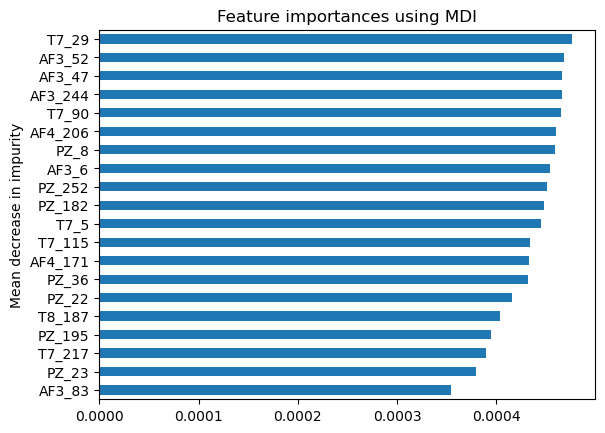

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=cols)
forest_importances.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots()
forest_importances[:20].plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [ ]:
X_train.columns = cols
X_test.columns = cols

In [ ]:
X_train.head()

,AF3_1,AF3_2,AF3_3,AF3_4,AF3_5,AF3_6,AF3_7,AF3_8,AF3_9,AF3_10,...,PZ_247,PZ_248,PZ_249,PZ_250,PZ_251,PZ_252,PZ_253,PZ_254,PZ_255,PZ_256
6466,57.281140,404.563144,1203.115654,1860.982265,1302.996096,-428.773324,-1842.287691,-1958.760345,-1457.231308,-1300.848653,...,-6.673462,-6.062573,-1.855691,1.263194,-0.086052,-3.485737,-5.089429,-5.480747,-6.858993,-7.018833
7667,57.744018,407.497202,1210.520969,1869.375469,1304.061041,-436.792336,-1850.511001,-1960.462668,-1456.308265,-1303.972501,...,4.365958,1.366311,-5.017001,-8.600538,-3.276273,5.066798,6.861814,2.780553,-0.152036,-0.262866
823,57.117771,403.226083,1198.356332,1851.497923,1292.211671,-432.715775,-1832.092682,-1935.023403,-1431.021336,-1285.982428,...,0.700646,6.476392,8.035054,5.420125,-0.186716,-5.862468,-6.888121,-3.236887,-1.716990,-6.596627
7354,58.669774,414.042085,1230.027111,1899.580220,1324.953260,-444.256775,-1878.670681,-1984.574810,-1469.051689,-1321.145460,...,-2.809457,-5.870494,-9.911852,-9.186723,-2.365308,5.835283,12.752951,18.762143,20.414355,12.576711
3436,57.260719,404.276038,1201.705287,1857.580766,1298.838609,-430.064940,-1838.093766,-1949.397702,-1444.599472,-1289.332046,...,-1.089842,-4.530721,-8.458281,-7.950604,-4.405607,-3.204028,-5.847669,-10.302610,-15.279894,-18.433964


In [ ]:
best_cols = ["T8", "AF4", "AF3", "PZ", "T7"]
cols = []
for c in best_cols:
    for i in range(1, 257):
        cols.append(f"{c}_{i}")
X_subset_train = X_train[cols]
X_subset_test = X_test[cols]


In [ ]:
clf = RandomForestClassifier(max_depth=10, n_estimators=250)
%timeit clf.fit(X_subset_train, y_train)

41.5 s ± 433 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def eval(X, y):
    score = clf.score(X, y)
    print(score)
%timeit eval(X_subset_train, y_train)

0.9940105414470531
0.9940105414470531
0.9940105414470531
0.9940105414470531
0.9940105414470531
0.9940105414470531
0.9940105414470531
0.9940105414470531
266 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def eval(X, y):
    score = clf.score(X, y)
    print(score)
%timeit eval(X_subset_test, y_test)

0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295019157
0.1096743295

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
clf_pca = RandomForestClassifier(max_depth=10, n_estimators=250)
%timeit clf_pca.fit(X_train_pca, y_train)

4.17 s ± 51.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def eval(model, X, y):
    score = model.score(X, y)
    print(score)

In [ ]:
%timeit eval(clf_pca, X_train_pca, y_train)

0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034020124
0.8882367034

In [ ]:
%timeit eval(clf_pca, X_test_pca, y_test)

0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214559387
0.1024904214

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC(decision_function_shape='ovo')

In [ ]:
X_train_pca.shape

(8348, 10)

In [ ]:
svc_clf.fit(X_train_pca, y_train)

SVC(decision_function_shape='ovo')

In [ ]:
%timeit eval(svc_clf, X_train_pca, y_train)

0.14805941542884524
0.14805941542884524
0.14805941542884524
0.14805941542884524
0.14805941542884524
0.14805941542884524
0.14805941542884524
0.14805941542884524
2.63 s ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
np.unique(svc_clf.support_).shape

(8348,)

## Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto")

In [ ]:
df = train_df.drop(["0"], axis=1).to_numpy()

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=10, n_init='auto', random_state=0)

In [ ]:
kmeans.labels_

array([0, 8, 8, ..., 0, 0, 2], dtype=int32)

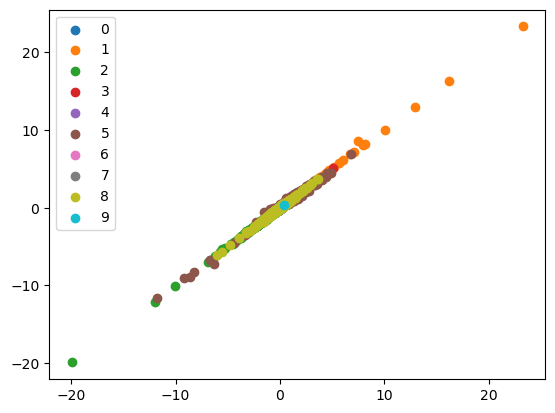

In [ ]:
#Getting unique labels

label = kmeans.fit_predict(df) 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 1] , df[label == i , 2] , label = i)
plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)

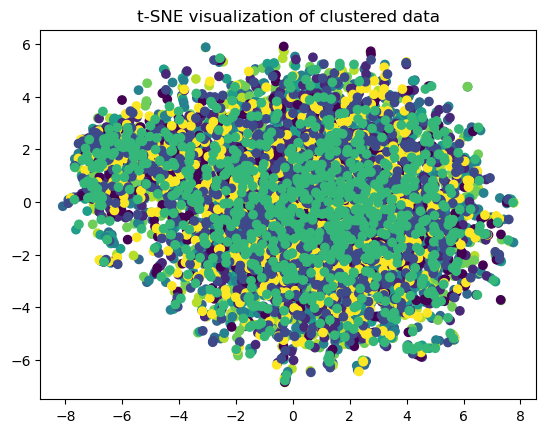

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_df["0"])
plt.title('t-SNE visualization of clustered data')
plt.show()

## Temp

In [ ]:
ins = forest_importances[:20].keys()

In [ ]:
X_train = df_s[ins]
y_train = df_s["label"]

X_test = df_test_s[ins]
y_test = df_test_s["label"]

In [ ]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.7937907244154848
Test score: 0.11591430757459832


In [ ]:
import seaborn as sns

<AxesSubplot: >

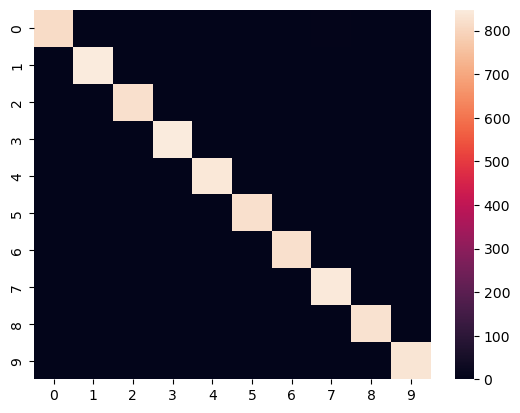

In [ ]:
y_pred = clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train,y_pred))

<AxesSubplot: >

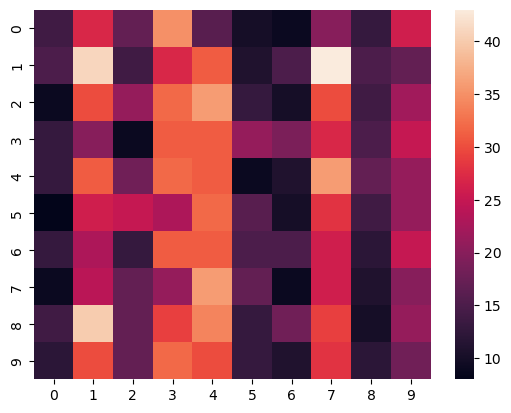

In [ ]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred))

<AxesSubplot: >

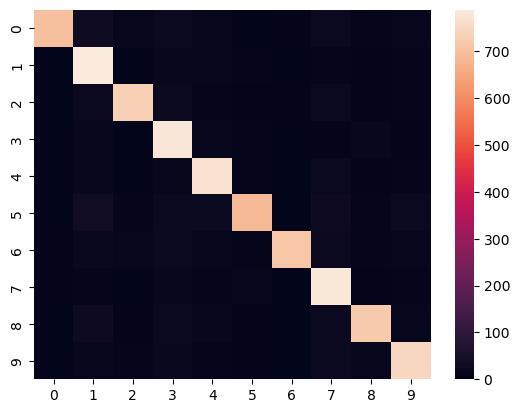

In [ ]:
y_pred = clf_pca.predict(X_train_pca)
sns.heatmap(confusion_matrix(y_train,y_pred))

<AxesSubplot: >

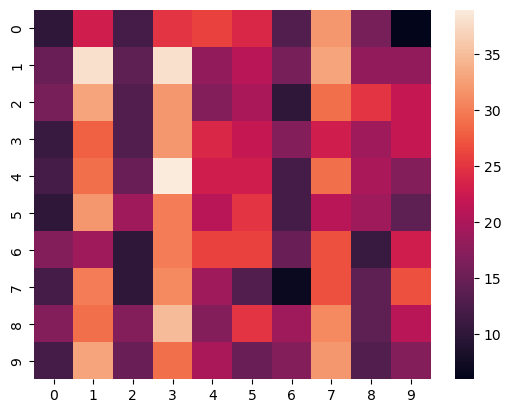

In [ ]:
y_pred = clf_pca.predict(X_test_pca)
sns.heatmap(confusion_matrix(y_test,y_pred))

In [ ]:
import torch 
from torch import nn
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

In [ ]:
# X_train = df_s.drop(["label"], axis=1)
# y_train = df_s["label"]

# X_test = df_test_s.drop(["label"], axis=1)
# y_test = df_test_s["label"]

In [ ]:
X_train.shape

(9392, 1280)

In [ ]:
class EEGEventData(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]).to(torch.float32), torch.tensor(self.y[idx])

In [ ]:
train_dt = EEGEventData(X_train.to_numpy(), y_train.to_numpy())
test_dt = EEGEventData(X_test.to_numpy(), y_test.to_numpy())

In [ ]:
train_loader = DataLoader(train_dt, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dt, batch_size=32, shuffle=True)

In [ ]:
x = next(iter(train_loader))
x[0].dtype

torch.float32

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, 200)
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(200, 10)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.lstm(x)
        x = self.relu(x[0])
        x = self.linear1(x)
        x = self.sig(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"

input_size = 1280
model = LSTMClassifier(input_size, 10).to(device)
print(model)    

LSTMClassifier(
  (lstm): LSTM(1280, 200)
  (relu): ReLU()
  (linear1): Linear(in_features=200, out_features=10, bias=True)
  (sig): Sigmoid()
)


In [ ]:
model(x[0].to(device)).shape

torch.Size([32, 10])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 50

In [ ]:
model.train()
best_loss = 1000000
best_loss_epoch = -1
for epoch in tqdm(range(epochs), desc="Epochs"):
    running_loss = []
    running_val_loss = []
    
    ## Training
    model.train()
    for step, (X, y) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        X = X.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
        out = model(X)
        
        loss = criterion(out, y) 
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.cpu().detach().numpy())
    
    
    ## Validation 
    model.eval()
    for step, (X, y) in enumerate(tqdm(test_loader, desc="Validation", leave=False)):
        X = X.to(device)
        y = y.to(device)
        
        out = model(X)
        loss = criterion(out, y) 
        running_val_loss.append(loss.cpu().detach().numpy())
   
    print("Epoch: {}/{} - Train Loss: {:.4f} Val Loss: {:.4f}".format(epoch+1, epochs,np.mean(running_loss), np.mean(running_val_loss)))
    
    if(np.mean(running_val_loss) < best_loss):
      # Keep track of the best  epoch
      print("Current best loss at epoch: ",epoch+1)
      best_loss_epoch = epoch+1
      best_loss = np.mean(running_val_loss) 
      store_data = {"model_state_dict": model.state_dict(),
            "optimzier_state_dict": optimizer.state_dict()
           }

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 1/50 - Train Loss: 2.3037 Val Loss: 2.3038
Current best loss at epoch:  1


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 2/50 - Train Loss: 2.3039 Val Loss: 2.3040


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 3/50 - Train Loss: 2.3035 Val Loss: 2.3028
Current best loss at epoch:  3


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 4/50 - Train Loss: 2.3037 Val Loss: 2.3035


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 5/50 - Train Loss: 2.3034 Val Loss: 2.3038


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 6/50 - Train Loss: 2.3036 Val Loss: 2.3037


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 7/50 - Train Loss: 2.3033 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 8/50 - Train Loss: 2.3035 Val Loss: 2.3025
Current best loss at epoch:  8


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 9/50 - Train Loss: 2.3035 Val Loss: 2.3025


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 10/50 - Train Loss: 2.3032 Val Loss: 2.3038


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 11/50 - Train Loss: 2.3033 Val Loss: 2.3036


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 12/50 - Train Loss: 2.3035 Val Loss: 2.3048


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 13/50 - Train Loss: 2.3033 Val Loss: 2.3026


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 14/50 - Train Loss: 2.3032 Val Loss: 2.3029


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 15/50 - Train Loss: 2.3035 Val Loss: 2.3027


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 16/50 - Train Loss: 2.3033 Val Loss: 2.3041


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 17/50 - Train Loss: 2.3035 Val Loss: 2.3036


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 18/50 - Train Loss: 2.3034 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 19/50 - Train Loss: 2.3035 Val Loss: 2.3027


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 20/50 - Train Loss: 2.3032 Val Loss: 2.3041


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 21/50 - Train Loss: 2.3033 Val Loss: 2.3027


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 22/50 - Train Loss: 2.3031 Val Loss: 2.3038


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 23/50 - Train Loss: 2.3032 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 24/50 - Train Loss: 2.3032 Val Loss: 2.3027


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 25/50 - Train Loss: 2.3029 Val Loss: 2.3034


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 26/50 - Train Loss: 2.3031 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 27/50 - Train Loss: 2.3035 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 28/50 - Train Loss: 2.3030 Val Loss: 2.3039


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 29/50 - Train Loss: 2.3030 Val Loss: 2.3038


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 30/50 - Train Loss: 2.3031 Val Loss: 2.3029


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 31/50 - Train Loss: 2.3029 Val Loss: 2.3028


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 32/50 - Train Loss: 2.3032 Val Loss: 2.3029


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 33/50 - Train Loss: 2.3030 Val Loss: 2.3043


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 34/50 - Train Loss: 2.3029 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 35/50 - Train Loss: 2.3032 Val Loss: 2.3034


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 36/50 - Train Loss: 2.3032 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 37/50 - Train Loss: 2.3029 Val Loss: 2.3033


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 38/50 - Train Loss: 2.3032 Val Loss: 2.3023
Current best loss at epoch:  38


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 39/50 - Train Loss: 2.3028 Val Loss: 2.3033


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 40/50 - Train Loss: 2.3032 Val Loss: 2.3034


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 41/50 - Train Loss: 2.3030 Val Loss: 2.3037


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 42/50 - Train Loss: 2.3029 Val Loss: 2.3042


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 43/50 - Train Loss: 2.3028 Val Loss: 2.3034


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 44/50 - Train Loss: 2.3028 Val Loss: 2.3030


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 45/50 - Train Loss: 2.3029 Val Loss: 2.3037


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 46/50 - Train Loss: 2.3028 Val Loss: 2.3035


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 47/50 - Train Loss: 2.3029 Val Loss: 2.3051


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 48/50 - Train Loss: 2.3027 Val Loss: 2.3031


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 49/50 - Train Loss: 2.3027 Val Loss: 2.3037


Training:   0%|          | 0/261 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Epoch: 50/50 - Train Loss: 2.3027 Val Loss: 2.3038


In [ ]:
torch.save(store_data["model_state_dict"], "lstm_mode_state.pt")
torch.save(store_data["optimzier_state_dict"], "optimizer_state.pt")

In [ ]:
device = "cpu"
model = LSTMClassifier(input_size, 10)
model.load_state_dict(store_data["model_state_dict"])
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer.load_state_dict(store_data['optimzier_state_dict'])
criterion = nn.CrossEntropyLoss()

In [ ]:
## Validation
def lstm_eval():
    y_pred = [] 
    model.eval()
    for step, (X, y) in enumerate(tqdm(test_loader, desc="Validation", leave=False)):
        X = X.to(device)
        y = y.to(device)
        
        out = model(X)
        out = torch.argmax(out, dim=1)
        n = out.cpu().detach().numpy()
        y_pred.extend(n.tolist())
       
    accuracy_score(y_test, y_pred)

In [ ]:
%timeit lstm_eval()

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

Validation:   0%|          | 0/66 [00:00<?, ?it/s]

214 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.09578544061302682